header: 4000 1000 0.025 0.1 1.35
c = 1.35
Courant number C = 0.3375


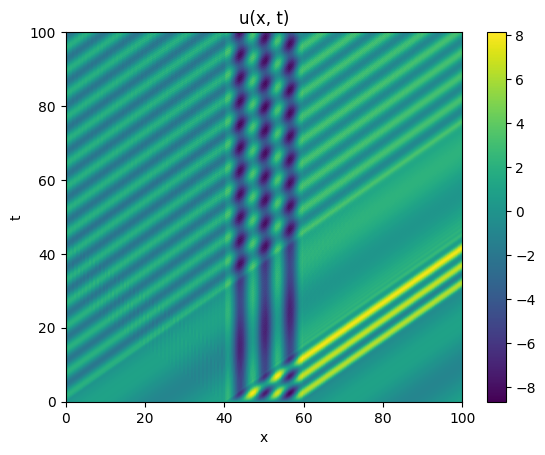

In [73]:
import matplotlib.pyplot as plt
import struct

byte_order = "little"

c = 0
C = 0
u = []
x_axis = []
y_axis = []
with open("../../results/conveq.bin", "rb") as file:
    header = file.read(32)
    K = int.from_bytes(header[0:4], byte_order)
    M = int.from_bytes(header[4:8], byte_order)
    tau = struct.unpack("d", header[8:16])[0]
    h = struct.unpack("d", header[16:24])[0]
    c = struct.unpack("d", header[24:32])[0]
    C = c*tau/h
    x_axis = [m*h for m in range(M+1)]
    y_axis = [k*tau for k in range(K+1)]
    print("header:", K, M, tau, h, c)
    for k in range(K + 1):
        chunk = file.read(8*(M+1))
        if len(chunk) < 8*(M+1):
            raise Exception(f"Bad data, k={k}/{K}")
        u += [[struct.unpack("d", chunk[(8*i):(8*i+8)])[0] for i in range(M + 1)]]

plt.pcolormesh(x_axis, y_axis, u)
plt.xlabel("x")
plt.ylabel("t")
plt.title(f"u(x, t)")
plt.colorbar()

print(f"c = {c}")
print(f"Courant number C = {C}")